In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import time
import ot
import os
import seaborn as sns
from datetime import datetime

In [2]:
sns.set_style("whitegrid")

In [3]:
#### GILD and GSK
ticker1 = 'JPM'
ticker2= 'MS'
log_dir = './{}_{}_logs'.format(ticker1, ticker2)

In [4]:
res = pd.read_csv('{}/{}_{}.csv'.format(log_dir, ticker1, ticker2))

In [5]:
res['Ratios'].min()

0.9552419077456462

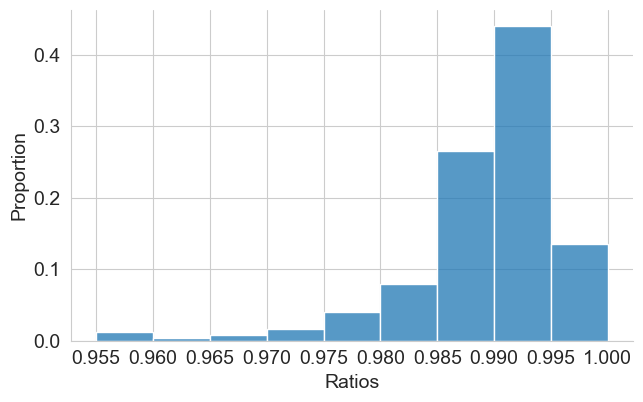

In [9]:
sns.displot(res['Ratios'], stat='probability', color='tab:blue', bins=np.linspace(0.955, 1.0, num=10), height=4, aspect=1.6)
plt.xticks(np.linspace(0.955, 1.0, num=10), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Ratios', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)
plt.savefig('{}/{}_{}.pdf'.format(log_dir, ticker1, ticker2), format='pdf',
            dpi=1000, bbox_inches='tight', pad_inches=0.1)

In [ ]:
# #### For GILD_GSK
# sns.displot(res['Ratios'], stat='probability', color='tab:blue', bins=np.linspace(0.775, 1.0, num=10), height=4, aspect=1.6)
# plt.xticks(np.linspace(0.775, 1.0, num=10), fontsize=14)
# plt.yticks(fontsize=14)
# plt.xlabel('Ratios', fontsize = 14)
# plt.ylabel('Proportion', fontsize = 14)
# plt.savefig('{}/{}_{}.pdf'.format(log_dir, ticker1, ticker2), format='pdf',
#             dpi=1000, bbox_inches='tight', pad_inches=0.1)

In [10]:
res[::40]

,time0,time1,time2,strike,MOT_max,MOT_min,McCormick_max,McCormick_min,Ratios
0,2022-02-28,2022-03-04,2022-04-01,116,3.517437,1.605462,3.511890,1.616202,0.991482
40,2022-04-26,2022-04-29,2022-05-27,102,3.311268,1.354986,3.304570,1.371439,0.988165
80,2022-06-23,2022-06-24,2022-07-22,93,2.915879,1.226350,2.908649,1.232318,0.992189
120,2022-08-19,2022-08-26,2022-09-23,104,2.554034,0.720751,2.536984,0.734529,0.983185
160,2022-10-17,2022-10-21,2022-11-18,96,3.070633,0.812611,3.066712,0.831104,0.990074
200,2022-12-13,2022-12-16,2023-01-13,113,2.896045,0.697131,2.894915,0.716008,0.990901
240,2023-02-10,2023-02-17,2023-03-17,120,2.570273,0.384927,2.564000,0.396599,0.991789


In [11]:
print(res[::40].to_latex(index=False, formatters={"name": str.upper}, float_format="{:.5f}".format))

\begin{tabular}{lllrrrrrr}
\toprule
     time0 &      time1 &      time2 &  strike &  MOT\_max &  MOT\_min &  McCormick\_max &  McCormick\_min &  Ratios \\
\midrule
2022-02-28 & 2022-03-04 & 2022-04-01 &     116 &  3.51744 &  1.60546 &        3.51189 &        1.61620 & 0.99148 \\
2022-04-26 & 2022-04-29 & 2022-05-27 &     102 &  3.31127 &  1.35499 &        3.30457 &        1.37144 & 0.98817 \\
2022-06-23 & 2022-06-24 & 2022-07-22 &      93 &  2.91588 &  1.22635 &        2.90865 &        1.23232 & 0.99219 \\
2022-08-19 & 2022-08-26 & 2022-09-23 &     104 &  2.55403 &  0.72075 &        2.53698 &        0.73453 & 0.98318 \\
2022-10-17 & 2022-10-21 & 2022-11-18 &      96 &  3.07063 &  0.81261 &        3.06671 &        0.83110 & 0.99007 \\
2022-12-13 & 2022-12-16 & 2023-01-13 &     113 &  2.89605 &  0.69713 &        2.89492 &        0.71601 & 0.99090 \\
2023-02-10 & 2023-02-17 & 2023-03-17 &     120 &  2.57027 &  0.38493 &        2.56400 &        0.39660 & 0.99179 \\
\bottomrule
\end{tabula

C:\Users\Sakura\AppData\Local\Temp\ipykernel_14548\283502282.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(res[::40].to_latex(index=False, formatters={"name": str.upper}, float_format="{:.5f}".format))


In [ ]:
with open('{}/{}_{}_px1.pickle'.format(log_dir, ticker1, ticker2), 'rb') as fp:
    px1 = pickle.load(fp)

with open('{}/{}_{}_X1.pickle'.format(log_dir, ticker1, ticker2), 'rb') as fp:
    X1 = pickle.load(fp)

In [ ]:
px1[0]

In [ ]:
X1[0]